**Import python packages that we will use for analysis**

When we import a package as something else, that is creating a shortcut for us to easily call the package. For example, import pandas as pd will allow us to type pd when calling a pandas function rather than pandas. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#from lets us import only a part of that package rather than the entire thing. 
#We only need the pyplot section of matplotlib so we are only importing that.
from matplotlib import pyplot as plt

#In order for plots to appear in the notebook we need this:
%matplotlib inline

**Define the directory where the data is located**

We are going to store this directory as a variable data_dir.

In [6]:
data_dir = "/home/ucsd-train02/projects/single_cell_intestine/raw_data/"
#Take a look at the string sotred in the data_dir variable
data_dir

'/home/ucsd-train02/projects/single_cell_intestine/raw_data/'

**Combining strings**

To get the full name of the file to read in, we need the directory plus the filename.

Combine two strings together in python with the +

In [8]:
data_dir+"batch1_counts.csv"

'/home/ucsd-train02/projects/single_cell_intestine/raw_data/batch1_counts.csv'

Here we combined a variable and a string. Why did this work? 

Because the variable data_dir is a placeholder for another string (the full path to the directory).

We will use this method to read in the csv file using the pandas command read_csv

**Load in data with pandas**

To call a function from a package, write that package name followed by a period.
Tab after the period to see all the functions that are available to you. 

In [ ]:
pd.

We are going to use the read_csv function to load in the data. When you call a function, initiate it with a parenthesis and then include all your arguments inside that parenthesis. Here, we need to give the filename and set the index as the first column. Shift tab tab inside of the parenthesis will bring up the help manual for the function.

In [9]:
#Store the dataframe with the name raw_counts
raw_counts = pd.read_csv(data_dir+"batch1_counts.csv", index_col=0)

#Print the size of the dataframe (number of rows and columns)
print(raw_counts.shape)

#look at the first 5 rows
raw_counts.head()

(15971, 1385)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Mrpl15,2,1,2,2,0,4,0,1,4,0,...,0,3,1,1,0,4,2,3,0,3
Lypla1,2,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,3,0,0,3
Gm37988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tcea1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,1
Atp6v1h,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Select genes for analysis**

There is A LOT of dropout in single cell data. Current rough estimates are that only ~10% of the transcriptome is acutally measured in each single cell. Therefore, it is important to only keep the genes for analysis that were detected in enough cells for us to gain meaningful information about them. A commonly used cutoff is to keep genes that were detected with at lest 1 UMI count in 10% of cells. Let's subset this dataframe for only those genes.

In [10]:
# Is the UMI count greater than 0 (at least 1). 
# I am going to wrap thisthis function in head to make it easy to view the result

(raw_counts > 0).head()

,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Mrpl15,True,True,True,True,False,True,False,True,True,False,...,False,True,True,True,False,True,True,True,False,True
Lypla1,True,False,False,True,False,False,False,False,True,False,...,False,True,False,True,False,False,True,False,False,True
Gm37988,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Tcea1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True
Atp6v1h,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Notice the result is a True/False (boolean) of whether or not the condition was satisfied. We are going to use .sum to count the number of True values in each row. The number of true values for each gene will tell us how many cells had a count of > 0 for that gene. 

In [14]:
#Axis = 1 calculates the sum across the rows (genes) instead of columns (cells)
#Again, using head to only look at the first 5 results. 

(raw_counts > 0).sum(axis=1).head()

Mrpl15     866
Lypla1     479
Gm37988      1
Tcea1      213
Atp6v1h    217
dtype: int64

We are interested in genes that were detected in at least 10% of cells. So we need genes where the sum that we just calculated is at least 10% of the total number of cells we have. First lets get the number corresponding to 10% of the cells.

In [17]:
#all the cell IDs are stored in the columns of our dataframe, 
#so we can get the total number of cells by finding the length of the columns

num_cells = len(raw_counts.columns)
0.1*num_cells

138.5

In [21]:
#now ask how many of those genes have a sum greater than 0.1% times the number of cells

((raw_counts > 0).sum(axis=1) > 0.1*num_cells).head()

Mrpl15      True
Lypla1      True
Gm37988    False
Tcea1       True
Atp6v1h     True
dtype: bool

In [23]:
#We are going to store this boolean result as the variable genes_to_keep:

genes_to_keep = (raw_counts > 0).sum(axis=1) > 0.1*num_cells
genes_to_keep.head()

Mrpl15      True
Lypla1      True
Gm37988    False
Tcea1       True
Atp6v1h     True
dtype: bool

Now subset the dataframe to only keep genes that have the True value. 

In [26]:
counts_filtered = raw_counts.loc[genes_to_keep]

#How many genes are we left with?
print(counts_filtered.shape)
counts_filtered.head()

(5355, 1385)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Mrpl15,2,1,2,2,0,4,0,1,4,0,...,0,3,1,1,0,4,2,3,0,3
Lypla1,2,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,3,0,0,3
Tcea1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,1
Atp6v1h,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rb1cc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


**How many UMIs are detected per cell?**

In this dataframe, the number of UMIs detected is the sum of the columns. Remember we summed the rows before. How do you get the column sums? Change the axis level!

In [30]:
counts_filtered.sum(axis=0).head()

B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal    5879
B1_AAACCGTGCCAAGT_Tuft                          2726
B1_AAACGCACAGCCTA_Goblet                        7517
B1_AAACGCACCAGATC_Endocrine                     8071
B1_AAACGCACCGCCTT_Stem                          6518
dtype: int64

Let's make a histogram of these counts so we can see how many UMIs are expressed in all of our cells.

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


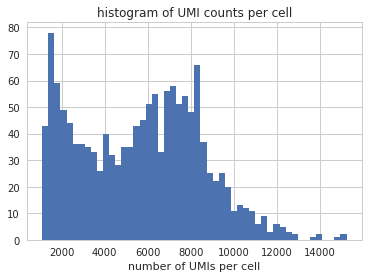

In [32]:
#make the background color white (default is grey)
sns.set_style("whitegrid")

#Histogram of the sums we calculated above. Increase the number of bins for higher resolution.
#What happens if you use different bin sizes? Try it out!
plt.hist(counts_filtered.sum(axis=0), bins=50)

#Give the plot an xlabel and a title
plt.xlabel("number of UMIs per cell")
plt.title('histogram of UMI counts per cell')

#This will prevent any text from being printed out other than your plot. 
#Sometimes these functions automatically print a lot of things that are annoying.
plt.show()

Do these counts look reasonable? Are there any cells that we should filter out? We can also display this as a boxplot. Or a voilinplot. Check out the code below.

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


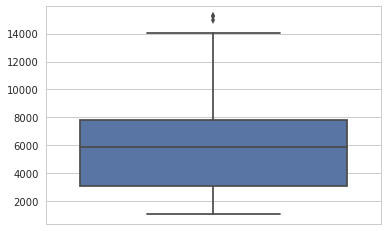

In [33]:
sns.boxplot(counts_filtered.sum(axis=0), orient='v')

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


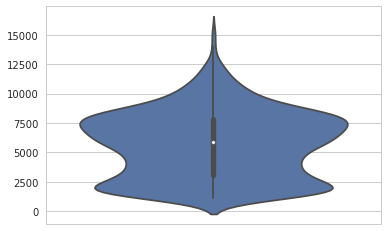

In [34]:
sns.violinplot(counts_filtered.sum(axis=0), orient='v')

**Exercise**

Make a histogram, boxplot, and violoinplot for the total counts measured for each gene (instead of cells). What do you notice? 

**Save Filtered DataFrame**

Let's save this new matrix as counts_filtered so we can load it in later for downstream analyses. We will use the pandas function to_csv

In [38]:
save_dir = "/home/ucsd-train02/projects/single_cell_intestine/results/"

counts_filtered.to_csv(save_dir+"counts_filtered.csv")